In [1]:
print("hola")

hola


# IDEAS 
* frecuencia de palabras en 'origen' y 'destino'
https://stackoverflow.com/questions/29903025/count-most-frequent-100-words-from-sentences-in-dataframe-pandas
* ruta mas demandada 
* origen y destino mas afectado por el tiempo
* limpiar 'edad' para que solo sean numeros
* frecuencia de palabras en 'mejoras_transporte'
* 'gasto mensual' por intervalos y filtrar para solo numeros 
* 'edad' por intervalos y filtrar para solo numeros 

# Iniciamos analisis exploratorio
<h3> origen y destino </h3>

comenzamos trabajando con **origen** y **destino** por ser de gran importancia y de mayor complejidad al ser preguntas abiertas 
* la proxima hay que preguntar solo colonia 
* veo complicado hacer un mapa a menos que tengamos a alguien dispuesto a etiquetar exhaustivamente (aun despues de la reduccion)

In [2]:
import pandas as pd
df = pd.read_excel('Encuesta.xlsx')
df.head(3)

,Marca temporal,1. ¿Cuál es tu punto de origen? Por favor proporciona la dirección exacta o área geográfica,2. ¿Cuál es tu destino? Por favor proporciona la dirección exacta o área geográfica,3. ¿Cuáles la razón prinicipal de su viaje?,4. ¿Qué medio de transporte utiliza para este viaje?,5. ¿Cuántos transbordos realiza en su trayecto?,6. ¿Cuánto tiempo tarda en llegar a su destino? (minutos o horas),7. ¿A qué hora comienza su viaje?,8. ¿A qué hora llega a su destino?,9. ¿Con qué frecuencia realiza este viaje?,...,16. ¿Cuál es su género?,17. ¿Cuál es su ocupación principal?,18. ¿Cuál es su ingreso mensual aproximado?,19. ¿Cuántos vehículos particulares hay en su hogar?,20. ¿Qué factores considera más importantes al elegir un medio de transporte?,"21. ¿Ha realizado cambios recientes en su forma de viajar? Si es así, ¿cuáles y por qué?.",22. ¿Qué mejoras desearía ver en el sistema de transporte?,"23. ¿Viaja sólo o acompañado? Si va acompañado, ¿con quién?",24. ¿Cuánto gasta en promedio en transporte al mes?,25. ¿Se siente seguro/a en el trayecto?
0,2024-09-23 18:47:08.977,#1318 calle 11 colonia obrera,UABC Sauzal,Estudio,Autobús,2,50 min,09:00:00,09:50:00,Diario,...,Femenino,Estudiante,10 mil,0,Seguridad,Muchas veces pido didi pero ya han subido tari...,Cambio de unidades y mejores rutas,Sola,120,2
1,2024-09-23 19:25:28.349,"Río Lerma #949, Col. Valle Dorado, Ensenada, B.C","Carr. Tijuana-Ensenada km. 107, Ensenada, B.C.",Estudio,Autobús,2,65 minutos,06:45:00,07:50:00,Diariamenre,...,Masculino,Estudiante,7000 (deposito de parte de mis padres),0,"Tiempo, Costo","Conseguir un carro, porque por mis horarios de...","Amplitud de horarios, disponibilidad,",Solo,"Antes gastaba 1800 incluyendo taxis y didis, c...",3
2,2024-09-24 09:32:47.103,Parada del Walmart de la Once,CICESE,Estudio,Autobús,0,45 minutos,08:00:00,09:00:00,5 días a la semana,...,Masculino,Estudiante,19 mil pesos,0,"Tiempo, Costo, Seguridad, Comodidad","Pedir ""ride"", porque el transporte público tar...",Unidades más grandes.,Solo,250 a 400 pesos,2


Listamos columnas (preguntas)

In [3]:
#cols_originales = list(df.columns)
#cols_originales[1:]

## === Paso I:  Renombrar las columnas ===

In [4]:
# Renombrar las columnas
new_column_names = [
    'origen',
    'destino',
    'razon_viaje',
    'transporte_utilizado',
    'num_transbordos',
    'tiempo_llegada',
    'hora_inicio',
    'hora_llegada',
    'frecuencia_viaje',
    'razon_transporte',
    'costo_viaje',
    'nivel_confort',
    'satisfaccion_transporte',
    'considera_otro_transporte',
    'edad',
    'genero',
    'ocupacion',
    'ingreso_mensual',
    'vehiculos_hogar',
    'factores_importantes',
    'cambios_viaje',
    'mejoras_transporte',
    'acompanamiento',
    'gasto_mensual_transporte',
    'seguridad_trayecto'
]

# Renombrar las columnas del DataFrame
df.columns = ['id'] + new_column_names


### Crear un diccionario para recordar los significados

In [5]:
# Crear un diccionario para las columnas originales y sus nombres accesibles
diccionario_columnas = {
    'origen': '¿Cuál es tu punto de origen? Por favor proporciona la dirección exacta o área geográfica', #por favor, restringir a la proxima a colonia
    'destino': '¿Cuál es tu destino? Por favor proporciona la dirección exacta o área geográfica',
    'razon_viaje': '¿Cuál es la razón principal de su viaje?',
    'transporte_utilizado': '¿Qué medio de transporte utiliza para este viaje?',
    'num_transbordos': '¿Cuántos transbordos realiza en su trayecto?',
    'tiempo_llegada': '¿Cuánto tiempo tarda en llegar a su destino? (minutos o horas)', # redundante con las siguientes 2
    'hora_inicio': '¿A qué hora comienza su viaje?', 
    'hora_llegada': '¿A qué hora llega a su destino?',
    'frecuencia_viaje': '¿Con qué frecuencia realiza este viaje?', # al dia? a la semana? 
    'razon_transporte': '¿Por qué eligió el medio de transporte que utiliza?',
    'costo_viaje': '¿Cuánto paga por su viaje?', #al dia? a la semana? al mes? variedad de respuestas abiertas
    'nivel_confort': '¿Cuál es su nivel de confort durante el trayecto?',
    'satisfaccion_transporte': '¿Qué tan satisfecho está con el servicio de transporte que utiliza?',
    'considera_otro_transporte': '¿Ha considerado usar otro medio de transporte? Si es así, ¿cuál?',
    'edad': '¿Cuál es su edad?',
    'genero': '¿Cuál es su género?',
    'ocupacion': '¿Cuál es su ocupación principal?',
    'ingreso_mensual': '¿Cuál es su ingreso mensual aproximado?',
    'vehiculos_hogar': '¿Cuántos vehículos particulares hay en su hogar?',
    'factores_importantes': '¿Qué factores considera más importantes al elegir un medio de transporte?',
    'cambios_viaje': '¿Ha realizado cambios recientes en su forma de viajar? Si es así, ¿cuáles y por qué?',
    'mejoras_transporte': '¿Qué mejoras desearía ver en el sistema de transporte?',
    'acompanamiento': '¿Viaja solo/a o acompañado/a? Si va acompañado/a, ¿con quién?',
    'gasto_mensual_transporte': '¿Cuánto gasta en promedio en transporte al mes?',
    'seguridad_trayecto': '¿Se siente seguro/a en el trayecto?'
}


# [!!!] del analisis exploratorio del dataframe crudo: 

### ======= para origen: =======

**Missing:**
0 (0%)
**Distinct:**
471 (87%)

**<h3>471 <br>
Distinct values </h3>**


--> hay que reducir los distinct

### ======= para destino: =======

**Missing:**
0 (0%)<br>
**Distinct:**
255 (47%)<br>
**CICESE:**
17%<br>
**Cicese:**
6%<br>
**CICESE :**
5%<br>
**Other:**
71%

--> reducir los distinct <br>
--> renombrar para coincidir 

In [6]:
df.head(3)

,id,origen,destino,razon_viaje,transporte_utilizado,num_transbordos,tiempo_llegada,hora_inicio,hora_llegada,frecuencia_viaje,...,genero,ocupacion,ingreso_mensual,vehiculos_hogar,factores_importantes,cambios_viaje,mejoras_transporte,acompanamiento,gasto_mensual_transporte,seguridad_trayecto
0,2024-09-23 18:47:08.977,#1318 calle 11 colonia obrera,UABC Sauzal,Estudio,Autobús,2,50 min,09:00:00,09:50:00,Diario,...,Femenino,Estudiante,10 mil,0,Seguridad,Muchas veces pido didi pero ya han subido tari...,Cambio de unidades y mejores rutas,Sola,120,2
1,2024-09-23 19:25:28.349,"Río Lerma #949, Col. Valle Dorado, Ensenada, B.C","Carr. Tijuana-Ensenada km. 107, Ensenada, B.C.",Estudio,Autobús,2,65 minutos,06:45:00,07:50:00,Diariamenre,...,Masculino,Estudiante,7000 (deposito de parte de mis padres),0,"Tiempo, Costo","Conseguir un carro, porque por mis horarios de...","Amplitud de horarios, disponibilidad,",Solo,"Antes gastaba 1800 incluyendo taxis y didis, c...",3
2,2024-09-24 09:32:47.103,Parada del Walmart de la Once,CICESE,Estudio,Autobús,0,45 minutos,08:00:00,09:00:00,5 días a la semana,...,Masculino,Estudiante,19 mil pesos,0,"Tiempo, Costo, Seguridad, Comodidad","Pedir ""ride"", porque el transporte público tar...",Unidades más grandes.,Solo,250 a 400 pesos,2


# == Paso II: Contar las palabras mas frecuentes en las columnas de interes (origen y destino) ==

* pendiente: tabla de las colonias que mas tardan en llegar a sauzal

In [7]:
# No funciona: 
#pd.Series(' '.join(df['origen']).lower().split()).value_counts()[:100]

# Verificar los tipos de datos
#print(df.dtypes)

# Inspeccionar los tipos en la columna 'origen'
print("-->tipos:\n", df['origen'].apply(type).value_counts())

# Filtrar valores que no sean cadenas
no_strings = df[~df['origen'].apply(lambda x: isinstance(x, str))]
print("-->no cadenas:\n", no_strings['origen']) # es porque alguien puso solo 89

# Convertir todo a strings
df['origen'] = df['origen'].astype(str)

-->tipos:
 origen
<class 'str'>    541
<class 'int'>      1
Name: count, dtype: int64
-->no cadenas:
 500    89
Name: origen, dtype: object


### sacamos top 100 de las palabras mas repetidas

In [8]:
origen_top100 = pd.Series(' '.join(df['origen']).lower().split()).value_counts()[:100]

origen_top100

de          97
calle       87
del         73
colonia     62
sauzal      61
            ..
22830        4
rio          4
al           4
riveroll     4
mar          4
Name: count, Length: 100, dtype: int64

In [9]:
#pd.Series(' '.join(df['origen']).lower().split()).value_counts()[:100]

destino_top100 = pd.Series(' '.join(df['destino']).lower().split()).value_counts()[:200]

destino_top100

cicese      195
uabc        162
sauzal       91
valle        67
dorado       64
           ... 
circuito      1
torres        1
(cigom)       1
/             1
s/n           1
Name: count, Length: 200, dtype: int64

# ======= Paso III: renombreo masivo ========

#### funcion gigante

In [10]:
import unicodedata

# Función para eliminar acentos
def eliminar_acentos(text):
    text = str(text)
    # Normalización Unicode y eliminación de caracteres con acentos
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    return text

# Función para aplicar reglas y eliminar acentos
def aplicar_reglas(text):
    text = eliminar_acentos(text.lower())  # Convertir a minúsculas y eliminar acentos

    # Aplicar reglas específicas
    if 'dorado' in text:
        return 'valle_dorado'
    elif 'uabc' in text:
        return 'uabc_sauzal'
    elif 'unam' in text:
        return 'unam'
    elif 'c.i.c.e.s.e' in text or 'cisece' in text:
        return 'cicese'
    elif 'cet' in text:
        return 'cetmar'
    elif 'nano' in text:
        return 'unam'
    elif 'morro' in text:
        return 'uabc_sauzal'
    elif 'astro' in text:
        return 'unam'
    elif 'cnyn' in text:
        return 'unam'
    elif 'colchonera' in text:
        return 'colchonera'
    elif 'obrera' in text:
        return 'obrera'
    elif 'moderna' in text:
        return 'moderna'
    elif 'acapulco' in text:
        return 'acapulco'
    elif 'autozone' in text:
        return 'autozone ' + ' '.join(filter(str.isdigit, text.split()))
    elif 'vista' in text:
        return 'buena_vista_(zorrillo)'
    elif 'bellavista' in text:
        return 'bellavista'
    elif 'aeropuerto' in text:
        return 'aeropuerto'
    elif '17' in text and 'abril' in text:
        return '17_abril'
    elif 'verde' in text:
        return 'valle_verde'
    elif 'encino' in text:
        return 'encinos'
    elif 'villa' in text and 'prado' in text:
        return 'villas_del_prado'
    elif 'villa' in text and 'real' in text:
        return 'villas_del_real'
    elif 'villa' in text and 'sol' in text:
        return 'villas_del_sol'
    elif 'villa' in text and 'roble' in text:
        return 'villas_del_roble'
    elif 'revolucion' in text:
        return 'colonia_revolucion'
    elif 'loma' in text and 'linda' in text:
        return 'loma_linda'
    elif 'chapultepec' in text:
        return 'valle_de_chapultepec'
    elif 'sauzal' in text:
        return 'sauzal'
    elif 'centro' in text:
        return 'centro'
    elif 'villas' in text:
        return 'villas'
    elif 'playitas' in text:
        return 'playitas'
    elif 'maneadero' in text:
        return 'maneadero'
    elif 'cicese' in text:
        return 'cicese'
    elif 'encinos' in text:
        return 'encinos'
    elif 'popular' in text:
        return 'popular'
    elif '89' in text:
        return '89'
    elif 'lomitas' in text:
        return 'lomitas'
    elif 'banda' in text:
        return 'punta banda'
    elif 'porticos' in text:
        return 'porticos'
    elif 'hidalgo' in text:
        return 'colonia_hidalgo'
    elif 'river' in text:
        return 'riveroll'
    
    # Si no coincide con ninguna regla, devolver el texto original
    return text


# Crear una copia del DataFrame original para trabajar en ella
df_transformed = df.copy()

# Aplicar las reglas a la copia
df_transformed['origen'] = df_transformed['origen'].apply(aplicar_reglas)
df_transformed['destino'] = df_transformed['destino'].apply(aplicar_reglas)


### df_transformed (renombrado)
se redujo el ruido causado por las preguntas abiertas

In [11]:
df_transformed.head(3)


,id,origen,destino,razon_viaje,transporte_utilizado,num_transbordos,tiempo_llegada,hora_inicio,hora_llegada,frecuencia_viaje,...,genero,ocupacion,ingreso_mensual,vehiculos_hogar,factores_importantes,cambios_viaje,mejoras_transporte,acompanamiento,gasto_mensual_transporte,seguridad_trayecto
0,2024-09-23 18:47:08.977,obrera,uabc_sauzal,Estudio,Autobús,2,50 min,09:00:00,09:50:00,Diario,...,Femenino,Estudiante,10 mil,0,Seguridad,Muchas veces pido didi pero ya han subido tari...,Cambio de unidades y mejores rutas,Sola,120,2
1,2024-09-23 19:25:28.349,valle_dorado,"carr. tijuana-ensenada km. 107, ensenada, b.c.",Estudio,Autobús,2,65 minutos,06:45:00,07:50:00,Diariamenre,...,Masculino,Estudiante,7000 (deposito de parte de mis padres),0,"Tiempo, Costo","Conseguir un carro, porque por mis horarios de...","Amplitud de horarios, disponibilidad,",Solo,"Antes gastaba 1800 incluyendo taxis y didis, c...",3
2,2024-09-24 09:32:47.103,parada del walmart de la once,cicese,Estudio,Autobús,0,45 minutos,08:00:00,09:00:00,5 días a la semana,...,Masculino,Estudiante,19 mil pesos,0,"Tiempo, Costo, Seguridad, Comodidad","Pedir ""ride"", porque el transporte público tar...",Unidades más grandes.,Solo,250 a 400 pesos,2


## exportamos
* datos de la encuesta con respuestas de 'origen' y 'destino' agrupadas

In [12]:
# Exportar el DataFrame completo a un archivo CSV
df_transformed.to_csv('df_transformed_1.csv', index=False)

print("El archivo 'df_transformed_1.csv' se ha exportado correctamente.")

El archivo 'df_transformed_1.csv' se ha exportado correctamente.


In [13]:
# Exportar a un archivo Excel
df_transformed.to_excel('df_transformed_1.xlsx', index=False)

print("El archivo 'df_transformed_1.xlsx' se ha exportado correctamente.")

El archivo 'df_transformed_1.xlsx' se ha exportado correctamente.


Aun asi, nos queda el siguiente resumen de los datos para "origen":

### para origen: 

**Missing:**
0 (0%)

**Distinct:**
219 (40%) <----> antes: 471 (87%)

**sauzal:**
11%

**centro:**
7%

**moderna:**
6%

**Other:**
77%

### para destino: 

**Missing:**
0 (0%)

**Distinct:**
65 (12%) <----> antes: 255 (47%)

**cicese:**
36%

**uabc_sauzal:**
21%

**valle_dorado:**
12%

**Other:**
31%

### como quedan ahora las mas frecuentes?

In [14]:
#transf_origen_top100 = pd.Series(' '.join(df_transformed['origen']).lower().split()).value_counts()[:100]
#transf_destino_top100 = pd.Series(' '.join(df_transformed['destino']).lower().split()).value_counts()[:200]

# frecuencias de los origenes y destinos

In [15]:
# Contar las frecuencias de los orígenes en orden descendente
origenes_frecuentes = df_transformed['origen'].value_counts()

# top 10
print(origenes_frecuentes.head(10))

origen
sauzal                  57
centro                  39
moderna                 30
valle_dorado            27
playitas                24
maneadero               19
uabc_sauzal             12
valle_de_chapultepec    11
valle_verde             10
encinos                  9
Name: count, dtype: int64


In [16]:
# Contar las frecuencias de los destinos en orden descendente
destinos_frecuentes = df_transformed['destino'].value_counts()

# top 10 
print(destinos_frecuentes.head(10))

destino
cicese                      197
uabc_sauzal                 113
valle_dorado                 65
unam                         28
centro                       26
cetmar                       19
sauzal                       15
playitas                     15
costco                        3
3152'07.5"n 11639'53.5"w      2
Name: count, dtype: int64


# ======= Paso IV: graficos =======

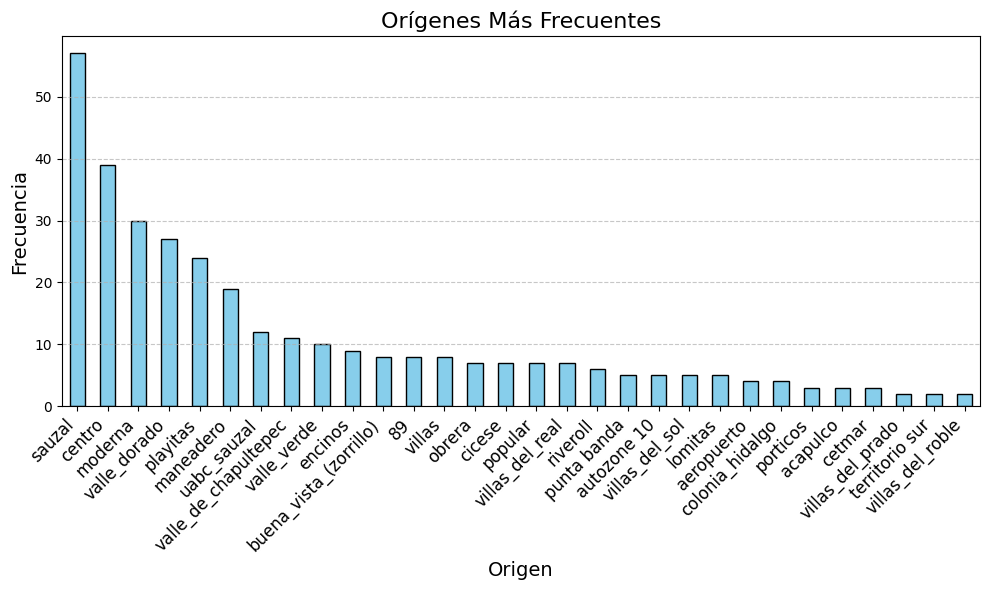

In [17]:
import matplotlib.pyplot as plt

# Obtener los 10 orígenes más frecuentes
origenes_frecuentes = df_transformed['origen'].value_counts().head(30)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
origenes_frecuentes.plot(kind='bar', color='skyblue', edgecolor='black')

# Personalizar
plt.title('Orígenes Más Frecuentes', fontsize=16)
plt.xlabel('Origen', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


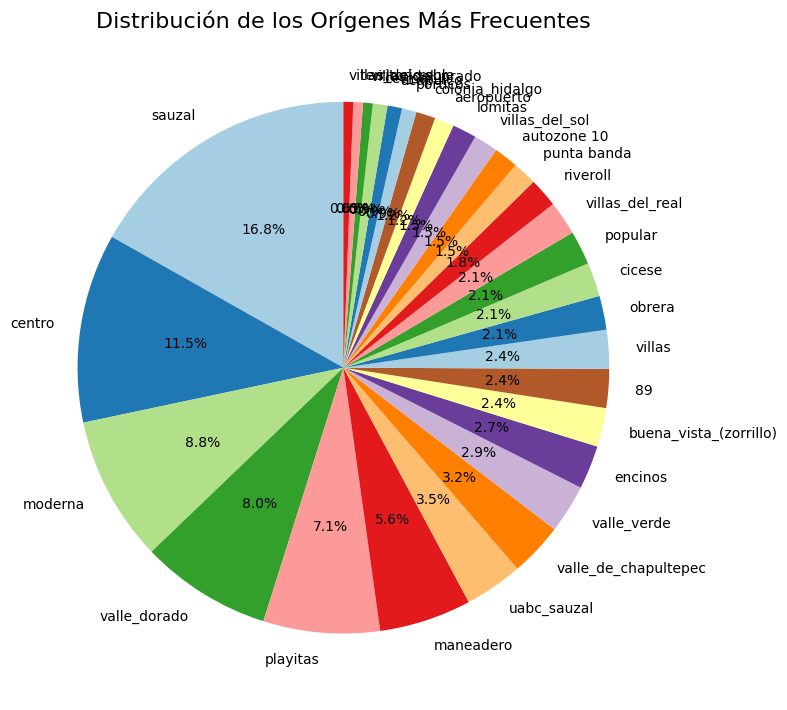

In [18]:
# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
origenes_frecuentes.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Personalizar
plt.title('Distribución de los Orígenes Más Frecuentes', fontsize=16)
plt.ylabel('')  # Quitar la etiqueta del eje Y para limpiar el gráfico

plt.tight_layout()
plt.show()


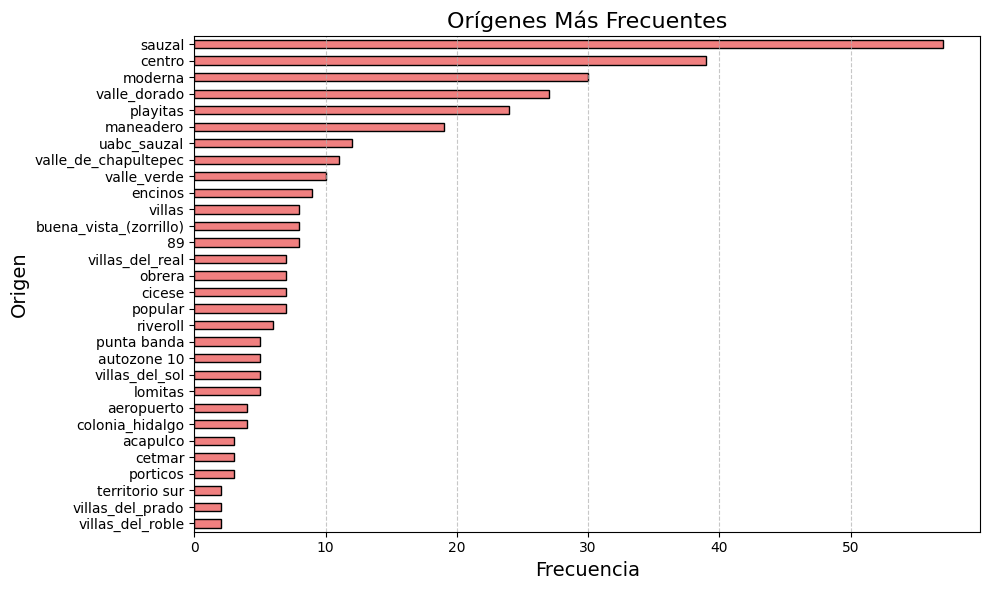

In [19]:
# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
origenes_frecuentes.sort_values().plot(kind='barh', color='lightcoral', edgecolor='black')

# Personalizar
plt.title('Orígenes Más Frecuentes', fontsize=16)
plt.xlabel('Frecuencia', fontsize=14)
plt.ylabel('Origen', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# rutas mas transitadas? 

* para este nos puede convenir agrupar uabc_sauzal-playitas-cicese-unam

La ruta más transitada es: sauzal → cicese con 24 viajes.


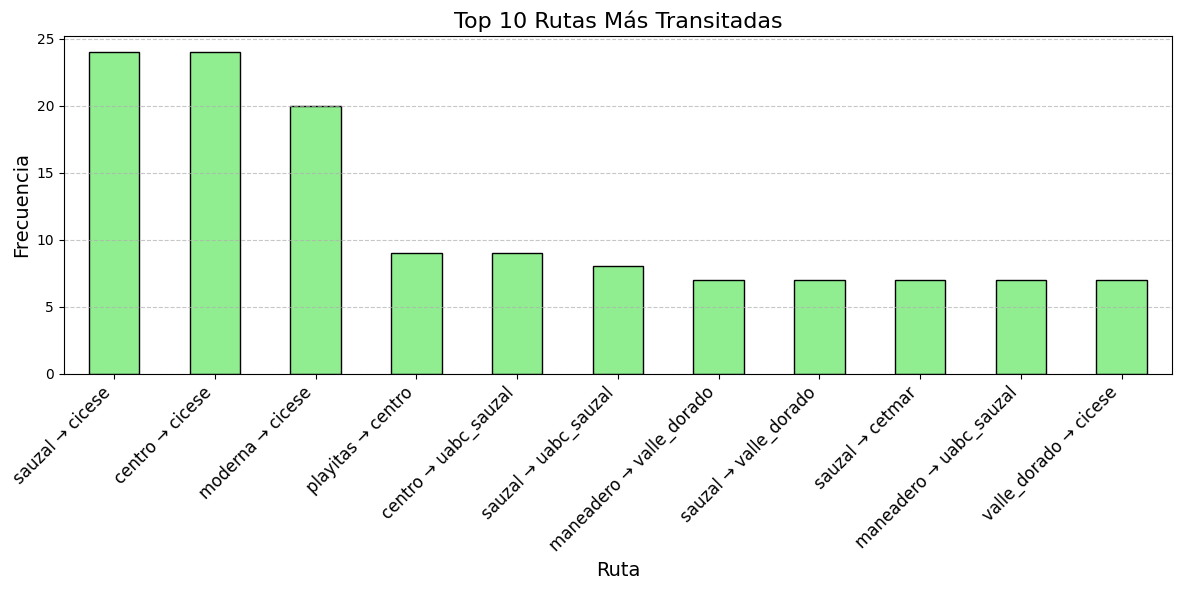

In [20]:
# columna que combine 'origen' y 'destino' para representar las rutas
df_transformed['ruta'] = df_transformed['origen'] + ' → ' + df_transformed['destino']

# frecuencia de cada ruta
rutas_frecuentes = df_transformed['ruta'].value_counts()

# ruta mas transitada
ruta_mas_transitada = rutas_frecuentes.idxmax()
frecuencia_maxima = rutas_frecuentes.max()

print(f"La ruta más transitada es: {ruta_mas_transitada} con {frecuencia_maxima} viajes.")

# plot 10 rutas más transitadas
plt.figure(figsize=(12, 6))
rutas_frecuentes.head(11).plot(kind='bar', color='lightgreen', edgecolor='black')

# plot
plt.title('Top 10 Rutas Más Transitadas', fontsize=16)
plt.xlabel('Ruta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
